In [1]:
# A6
# Swathi K Srikanta -2018AB04062
# Jennifer - 2018AB04051
# Priyabrat kumar Bishwal - 2018AB04056

In [1]:
# Organising Imports 
import pandas as pd
import numpy as np 
import os 
import json
import re
from numpy import loadtxt
from matplotlib import pyplot
from sklearn import preprocessing
import seaborn as sns
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200

In [2]:
data_path = os.getcwd()
print("The current working directory is: "+data_path)

The current working directory is: /Users/pbishwal/Documents/Techie/BITS/SEM2/Assignments/DS/A6


In [19]:
nyc_jobs_df = pd.read_csv(data_path+"/data.csv") 

In [4]:
with open(data_path+'/metadata.json') as f:
    metadata = json.load(f)

    

In [5]:
# get the shape of data
nyc_jobs_df.shape

(3228, 28)

In [6]:
# head
nyc_jobs_df.head(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $45,000 per year",NaN,NaN,NaN,NaN,"New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to r...",2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-08-20T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, also email your resume and cover letter including the following subject line: Executive Director â€“ Business Development to: careers@sbs.nyc.gov...",NaN,NaN,NaN,"New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to r...",2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-08-20T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heating Unit,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid in the State of New York is required for these positions. This license must be maintained for the duration of the assignment. 2. A Certificate of ...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-08-20T00:00:00.000


In [7]:
#get the number of columns
nyc_jobs_df.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

# EDA -- Processing -- Cleaning && Analysis

In [8]:
# descriptions
nyc_jobs_df.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
count,3228.000000,3228.000000,3228.000000,3228.000000,0.0
mean,373278.506506,2.519207,57231.734368,84025.572126,NaN
std,46839.540065,7.988988,26774.118785,43902.861012,NaN
min,87990.000000,1.000000,0.000000,10.360000,NaN
25%,373472.000000,1.000000,47214.000000,60403.000000,NaN
50%,392289.000000,1.000000,57035.000000,80000.000000,NaN
75%,399787.250000,1.000000,71228.250000,104523.000000,NaN
max,406986.000000,150.000000,218587.000000,234402.000000,NaN


In [9]:
nyc_jobs_df.describe(include=['object'])

,Agency,Posting Type,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Salary Frequency,Work Location,...,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
count,3228,3228,3228,3228,3228,3228,3226,2941,3228,3228,...,2804,1950,3227,1055,1484,3228,3228,984,3228,3228
unique,54,2,1326,330,344,18,130,2,3,238,...,1390,683,1050,196,247,51,486,110,463,1
top,DEPT OF ENVIRONMENT PROTECTION,Internal,Project Manager,COMMUNITY COORDINATOR,56058,0,"Engineering, Architecture, & Planning",F,Annual,96-05 Horace Harding Expway,...,ERROR: #NAME?,"Appointments are subject to OMB approval. For additional information about DEP, visit www.nyc.gov/dep DEP is an equal opportunity employer with a strong commitment to the diversity of our organiz...","Click the ""Apply Now"" button.",35 Hours,"30-30 Thomson Avenue, LIC, NY","New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to r...",2019-08-16T00:00:00.000,2019-08-30T00:00:00.000,2019-08-16T00:00:00.000,2019-08-20T00:00:00.000
freq,699,1821,28,205,205,1268,524,2777,2955,293,...,32,108,300,197,175,1848,101,71,107,3228


In [10]:
nyc_jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 28 columns):
Job ID                           3228 non-null int64
Agency                           3228 non-null object
Posting Type                     3228 non-null object
# Of Positions                   3228 non-null int64
Business Title                   3228 non-null object
Civil Service Title              3228 non-null object
Title Code No                    3228 non-null object
Level                            3228 non-null object
Job Category                     3226 non-null object
Full-Time/Part-Time indicator    2941 non-null object
Salary Range From                3228 non-null float64
Salary Range To                  3228 non-null float64
Salary Frequency                 3228 non-null object
Work Location                    3228 non-null object
Division/Work Unit               3228 non-null object
Job Description                  3228 non-null object
Minimum Qual Requirements    

#### Getting nulls and missing values info

In [11]:
## Counting the nulls in each column of dataframe 


print("***Count all NaN in a DataFrame (both columns & Rows)***")
print("Total NaN in Dataframe" , nyc_jobs_df.isnull().sum().sum(), sep='\n')
print('\n')
print("***Count NaN in each column of a DataFrame***")
print("Nan in each columns" , nyc_jobs_df.isnull().sum(), sep='\n')


***Count all NaN in a DataFrame (both columns & Rows)***
Total NaN in Dataframe
11395


***Count NaN in each column of a DataFrame***
Nan in each columns
Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Code No                       0
Level                               0
Job Category                        2
Full-Time/Part-Time indicator     287
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          14
Preferred Skills                  424
Additional Information           1278
To Apply                            1
Hours/Shift                      2173
Work Location 1                  1744
Recruitmen

In [12]:
print("Total na in Dataframe" , nyc_jobs_df.isna().sum().sum(), sep='\n')
print('\n')
print("***Percentage of na in each column of a DataFrame***")
print("Nan in each columns" , nyc_jobs_df.isna().mean().round(4)*100, sep='\n')


Total na in Dataframe
11395


***Percentage of na in each column of a DataFrame***
Nan in each columns
Job ID                             0.00
Agency                             0.00
Posting Type                       0.00
# Of Positions                     0.00
Business Title                     0.00
Civil Service Title                0.00
Title Code No                      0.00
Level                              0.00
Job Category                       0.06
Full-Time/Part-Time indicator      8.89
Salary Range From                  0.00
Salary Range To                    0.00
Salary Frequency                   0.00
Work Location                      0.00
Division/Work Unit                 0.00
Job Description                    0.00
Minimum Qual Requirements          0.43
Preferred Skills                  13.14
Additional Information            39.59
To Apply                           0.03
Hours/Shift                       67.32
Work Location 1                   54.03
Recruitment Conta

#### observations from describe method 
1 : Since Recruitment Contact is having count 0 and it all values NaN <br> 
2 : Process Date column is having only single unique record . <br>

Hence above 2 columns can be dropped from the dataset.

### Data Preparation  <br>  Identification of Variables <br>Variable Selection<br> Feature Engineering <br> Missing Value or Data

#### Framing a new column experience in the dataSet

In [25]:
nyc_jobs_df['experience'] = nyc_jobs_df['Minimum Qual Requirements'].str.extract(r'(\w+)\syears.+experience')
years = {'two':2,
        'three':3,
        'four':4,
        'five':5,
        'six':6,
        '4':4,
        'eight':8,
        'seven':7,
        'ten':10,
        '10':10,
        '3':3,
        '5':5,
        '2':2
}
nyc_jobs_df['experience'] = nyc_jobs_df['experience'].str.lower().map(years)
nyc_jobs_df['experience'].value_counts()

2.0     977
3.0     592
5.0     395
4.0     383
6.0      77
10.0     15
8.0      14
7.0       8
Name: experience, dtype: int64

In [26]:
nyc_jobs_df['experience'].dropna().head(2)

2    3.0
3    3.0
Name: experience, dtype: float64

In [27]:
nyc_jobs_df.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date', 'experience'],
      dtype='object')

#### Encoding the labels that contains text/string data

In [28]:
# below indexes are columns with text data types 
nyc_jobs_temp= nyc_jobs_df.iloc[:,[1,2,4,5,7,12]]

# below contains columns salary range from  and salary range To  for all rows 
nyc_jobs_y= nyc_jobs_df.iloc[:,[10,11]]

## lets include '# Of Positions' in nyc_jobs_temp to see its relative significance 
nyc_jobs_temp['# Of Positions'] =nyc_jobs_df.iloc[:,3]
nyc_jobs_df2 =nyc_jobs_temp.apply(preprocessing.LabelEncoder().fit_transform)



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### find the importance of features (Variable Selection ) 

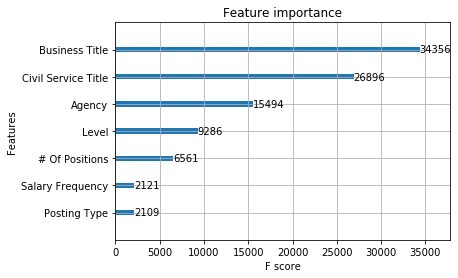

In [29]:
model = XGBClassifier()
model.fit(nyc_jobs_df2, nyc_jobs_y.iloc[:,0])
# plot feature importance
plot_importance(model)
pyplot.show()

In [21]:
nyc_jobs_df2.head(5)

,Agency,Posting Type,Business Title,Civil Service Title,Level,Salary Frequency,# Of Positions
0,10,1,39,141,1,0,0
1,10,1,586,15,12,0,0
2,40,1,850,222,0,0,25
3,40,0,850,222,0,0,25
4,40,1,1269,236,0,2,24


In [30]:
to_drop=['Recruitment Contact','Post Until', 'Posting Updated', 'Process Date','# Of Positions','Posting Type']
nyc_jobs_refined = nyc_jobs_df.drop(to_drop,axis=1).fillna({'Full-Time/Part-Time indicator':"other"}).dropna(subset = ['Job Category'])

# since column values are of object types  and represent different meaning for each column so all the columnsx`x`
# are not replaced  using any fillna function only column described above are replaced
# remove NaN values from column Job Category as it contains only 2 rows 

In [31]:
#describe the new dataframe 
nyc_jobs_refined.describe()

,Job ID,Salary Range From,Salary Range To,experience
count,3226.000000,3226.000000,3226.000000,2461.000000
mean,373452.303162,57235.242883,84007.144397,3.257619
std,46330.567017,26781.075469,43893.776873,1.379683
min,132292.000000,0.000000,10.360000,2.000000
25%,373602.000000,47273.000000,60403.000000,2.000000
50%,392289.000000,57035.000000,80000.000000,3.000000
75%,399787.750000,71366.750000,104364.000000,4.000000
max,406986.000000,218587.000000,234402.000000,10.000000


### Q1. What are the highest paid Skills in the US market?


In [32]:
nyc_jobs_refined['Job Category'].value_counts().head()

Engineering, Architecture, & Planning        524
Technology, Data & Innovation                362
Building Operations & Maintenance            220
Legal Affairs                                207
Public Safety, Inspections, & Enforcement    204
Name: Job Category, dtype: int64

In [35]:
nyc_jobs_df_3 = nyc_jobs_refined.groupby('Civil Service Title').agg(
    {
         'Salary Range From':"max",
         'Salary Range To':"max"
        
    }
)
nyc_jobs_df_4 = nyc_jobs_df_3.sort_values(['Salary Range To'],ascending=False)
nyc_jobs_df_4.head(5)

,Salary Range From,Salary Range To
Civil Service Title,,
EXECUTIVE AGENCY COUNSEL,145000.0,234402.0
SENIOR GENERAL DEPUTY MANAGER,103620.0,234402.0
EXECUTIVE DEPUTY COMMISSIONER,113113.0,230000.0
COMPUTER SYSTEMS MANAGER,130001.0,225217.0
DEPUTY COMMISSIONER (HEALTH),94981.0,225217.0


In [37]:
nyc_jobs_df_5 = nyc_jobs_refined.groupby(['Job Category','experience']).agg(
    {
         'Salary Range From':"max",
         'Salary Range To':"max",  
    }
)
nyc_jobs_df_6 = nyc_jobs_df_5.sort_values(['Salary Range To'],ascending=False)
nyc_jobs_df_6.head(5)

,,Salary Range From,Salary Range To
Job Category,experience,,
Building Operations & Maintenance,10.0,103620.0,234402.0
"Legal Affairs Public Safety, Inspections, & Enforcement",4.0,103620.0,234402.0
Health,5.0,113113.0,230000.0
"Health Policy, Research & Analysis",4.0,94981.0,225217.0
"Technology, Data & Innovation",3.0,125000.0,225217.0


### Depict visually what are the different salary ranges based on job category and years of experience.

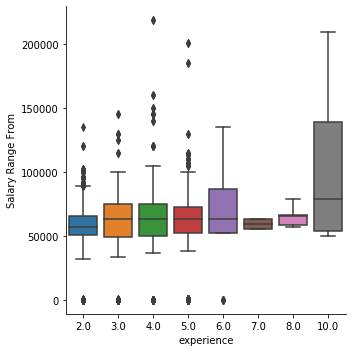

In [38]:
import seaborn as sns
sns.catplot(x="experience", y="Salary Range From", kind="box", data=nyc_jobs_df[['experience','Salary Range From']]);

Since there were lot of job category so visualisation is little difficult for all of them hence here a function is 
written to visualise the job category and salary ranges 

<b>Note</b> : This is without using any clustering just to visualise the range of salary for each job category 

In [39]:
def visual_job_category_sal(job_category):
    data=nyc_jobs_df.loc[nyc_jobs_df['Job Category'].isin([job_category ])][['Salary Range From','Job Category']]
    sns.catplot(x="Job Category", y="Salary Range From", kind="box", data=data)

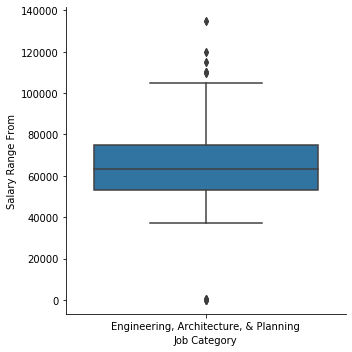

In [132]:
visual_job_category_sal('Engineering, Architecture, & Planning')

In [40]:
nyc_jobs_refined['Job Category'].unique()

array(['Maintenance & Operations', 'Finance, Accounting, & Procurement',
       'Health Public Safety, Inspections, & Enforcement',
       'Engineering, Architecture, & Planning',
       'Clerical & Administrative Support',
       'Information Technology & Telecommunications',
       'Finance, Accounting, & Procurement Information Technology & Telecommunications',
       'Community & Business Services',
       'Clerical & Administrative Support Legal',
       'Clerical & Administrative Support Community & Business Services',
       'Social Services',
       'Engineering, Architecture, & Planning Maintenance & Operations',
       'Health', 'Clerical & Administrative Support Policy & Analysis',
       'Community & Business Services Social Services',
       'Public Safety, Inspections, & Enforcement', 'Legal',
       'Policy & Analysis Social Services',
       'Information Technology & Telecommunications Policy & Analysis Social Services',
       'Legal Policy & Analysis',
       'Finance

#### Depict above using Clustering 

In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture #For GMM clustering



In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score


### Q3. Applying clustering concepts, please depict visually what are the different salary ranges based on job category and years of experience.

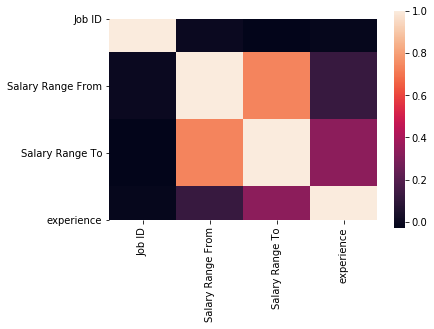

In [42]:
#Correlation among variables
cor = nyc_jobs_refined.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [57]:
data=nyc_jobs_refined[["Salary Range From","Salary Range To","experience"]]

In [53]:
data.head(4)

,Salary Range From,Salary Range To,experience,Job Category
2,51907.68,54580.32,3.0,Maintenance & Operations
3,51907.68,54580.32,3.0,Maintenance & Operations
4,35.00,35.00,5.0,Maintenance & Operations
5,35.00,35.00,5.0,Maintenance & Operations


In [58]:
data["salary_range"]=nyc_jobs_refined["Salary Range To"]-nyc_jobs_df["Salary Range From"]
data=data.dropna()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
data.head(4)

,Salary Range From,Salary Range To,experience,salary_range
2,51907.68,54580.32,3.0,2672.64
3,51907.68,54580.32,3.0,2672.64
4,35.00,35.00,5.0,0.00
5,35.00,35.00,5.0,0.00


In [60]:
#Scaling of data
ss = StandardScaler()
ss.fit_transform(data)

array([[-0.33849058, -0.83490334, -0.18676122, -0.86043496],
       [-0.33849058, -0.83490334, -0.18676122, -0.86043496],
       [-2.43395371, -2.1848601 ,  1.2631421 , -0.9511316 ],
       ...,
       [-0.19676751, -0.20578486, -0.91171287, -0.11686796],
       [ 0.49239297, -0.08203852, -0.18676122, -0.52612681],
       [ 0.49239297, -0.08203852, -0.18676122, -0.52612681]])

In [49]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(data, 2)
kmeans = pd.DataFrame(clust_labels)
data.insert((data.shape[1]),'kmeans',kmeans)

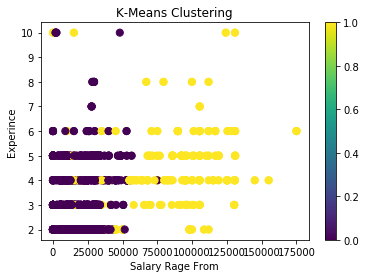

In [50]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['salary_range'],data['experience'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Salary Rage From')
ax.set_ylabel('Experince')
plt.colorbar(scatter)

In [51]:
nyc_jobs_refined.columns

Index(['Job ID', 'Agency', 'Business Title', 'Civil Service Title',
       'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Residency Requirement', 'Posting Date', 'experience'],
      dtype='object')